## Aufgabe 6.2

Der Datensatz 'diabetes.csv' ist eine Sammlung von medizinischen Daten, die vom
National Institute of Diabetes and Digestive and Kidney Diseases, erhoben
wurden, siehe
[https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download](https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download).
Bei Frauen des Pima-Stammes wurden folgende medizinische Daten erhoben:

* Pregnancies: Anzahl der Schwangerschaften
* Glucose: Glukose-Level im Blut
* BloodPressure: Messung des Blutdrucks
* SkinThickness: Dicke der Haut
* Insulin: Messung des Insulinspiegels im Blut
* BMI: Body-Maß-Index (Gewicht geteilt durch Körpergröße ins Quadrat)
* DiabetesPedigreeFunction: Wahrscheinlichkeit von Diabetes aufgrund der Familienhistorie
* Age: Alter

Enthalten ist auch, ob bei der Person Diabetes festgestellt wurde oder nicht.

* Outcome: Diabetes = 1, kein Diabetes = 0

Führen Sie eine explorative Datenanalyse (EDA) durch. Führen Sie dazu
Python-Code in Code-Zellen aus und geben Sie in Markdown-Zellen Ihre Antworten
auf die folgenden Frage an.

1. Welche Daten enthält der Datensatz? Wie viele Personen sind in der Tabelle
   enthalten? Wie viele Merkmale werden dort beschrieben?

In [5]:
import pandas as pd 

daten = pd.read_csv('diabetes.csv')
daten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Der Datensatz enthält 768 Personen mit insgesamt 9 Merkmalen. Aufgelistet sind die Merkmale Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age und Outcome.

2. Sind die Daten vollständig?

Die Daten sind für jedes Merkmal vollständig. In jeder Spalte gibt es 768 non-null Einträge.

3. Welchen Datentyp haben die Merkmale? Welche Merkmale sind numerisch und
   welche sind kategorial?

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age und Outcome sind Integers. BMI und DiabetesPedigreeFunction sind Floats. Kein Merkmal wird als object eingestuft.

4. Erstellen Sie eine Übersicht der statistischen Merkmale für die numerischen
   Daten. Visualisieren Sie anschließend die statistischen Merkmale mit
   Boxplots. Interpretieren Sie die statistischen Merkmale. Gibt es Ausreißer?
   Sind die Werte plausibel?

In [6]:
daten.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Die Pregnancies reichen von 0 Schwangerschaften bis hin zu 17 Schwangerschaften, was ungewöhnlich hoch ist. Der Mittelwert von 3.85 Schwangerschaften erscheint plausibel, 50 % der Frauen waren maximal dreimal schwanger.

Der Glucose-Wert reicht von 0 bis 199. An der Stelle müsste mit einem Mediziner Rücksprache gehalten werden, ob ein Glucose-Wert von 0 plausibel ist. 

Beim BloodPressure, also den Blutdruck, ist der minimale Wert von 0 jedoch unplausibel. Eine PErson mit einem Blutdruck von 0 ist tot. 

SkinThickness kann erneut nur von Medizinern korrekt eingeordnet werden. Ob eine minimale SkinThickness von 0 und eine maximale SkinThickness von 99 sinnvolle Werte darstellen, können Nichtmediziner nicht sinnvoll beurteilen.

Auch der minimale Insulin-Wert von 0 wirkt seltsam sowie der Body-Maß-Index BMI. Ein BMI von 0 kann nicht sein, denn beim BMI wird das Gewicht einer Person durch die quadrierte Körpergröße geteilt. Ein BMI von 0 bedeutet ein Gewicht von 0, was nicht sein kann.

Die DiabetesPedigree-Funktion können wir ohne medizinisches Fachwissen nicht bewerten.

Beim Alter fällt auf, dass keine Kinder dabei waren. Die jüngste Person ist 21, das mittlere Alter liegt bei 33 Jahren und 75 % aller Personen sind jünger als 41. 

Das Outcome darf nicht einfach statistisch interpretiert werden. Das Outcome gibt an, ob eine Person Diabetes hat (1) oder nicht (0). Auch wenn hier Zahlen verwendet wurden, ist das Outcome eigentlich ein kategoriales Merkmal. Es ist sogar die kategoriale Zielgröße unserer Problemstellung.

5. Erstellen Sie eine Scatter-Matrix mit Insulin, BMI und Outcome. Welche der
  beiden Eigeschaften Insulin oder BMI könnte ehr geeignet sein, Diabetes
  ja/nein zu prognostizieren?

In [8]:
import plotly.express as px 

auswahl = ['Insulin', 'BMI', 'Outcome']
fig = px.scatter_matrix(daten[auswahl],
    title='Wirkung Insulin und BMI auf Diabetes')
fig.show()

Beim Insulin kann man kaum eine Wirkung des Insulins auf den Diabeteszustand erkennen. Beim BMI kann man erkennen, dass ein höherer BMI scheinbar mehr zu Diabetes führt als ein niedriger BMI.

In [10]:
fig = px.scatter(daten, x = 'BMI', y = 'Outcome',
    title='Wirkung BMI auf Diabetes')
fig.show()

Es ist kaum ein Zusammenhang erkennbar außer der Feststellung, dass höherer BMI anscheinend häufiger mit Diabetes korreliert ist als niedriger BMI.

7. Trainieren Sie mit den numerischen Merkmalen einen Entscheidungsbaum/Decision Tree.

In [15]:
X = daten.loc[:, 'Pregnancies' : 'Age']
y = daten['Outcome']

In [17]:
from sklearn.tree import DecisionTreeClassifier

modell = DecisionTreeClassifier()
modell.fit(X,y)

score = modell.score(X,y)
print(f'Score: {score:.2f}')

Score: 1.00


8. Visualisieren Sie den Entscheidungsbaum

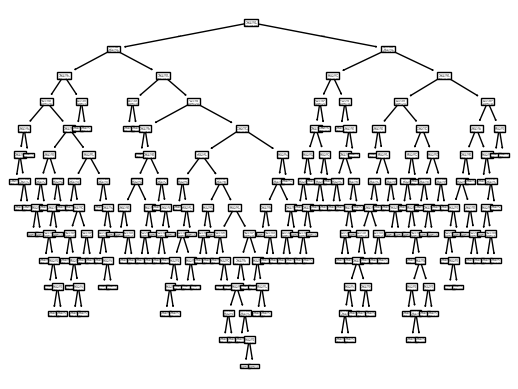

In [18]:
from sklearn.tree import plot_tree

plot_tree(modell);

9. Spielen Sie mit den Hyperparametern des Entscheidungsbaumes/Decision Trees. Begrenzen Sie die Baumtiefe auf 2, 3 und 4. Was sind die wichtigsten Merkmale, die Diabetes auslösen können?

In [19]:
for baumtiefe in [2, 3, 4]:
    baum = DecisionTreeClassifier(max_depth=baumtiefe)
    baum.fit(X,y)
    score = baum.score(X,y)
    print(f'Score für eine Baumtiefe von {baumtiefe}: {score: .2f}')

Score für eine Baumtiefe von 2:  0.77
Score für eine Baumtiefe von 3:  0.78
Score für eine Baumtiefe von 4:  0.79


Wieder gibt es kaum Unetrschiede im Score für die verschiedenen Baumtiefen. Wir betrachten nun ein Modell das Baumtiefe 2.

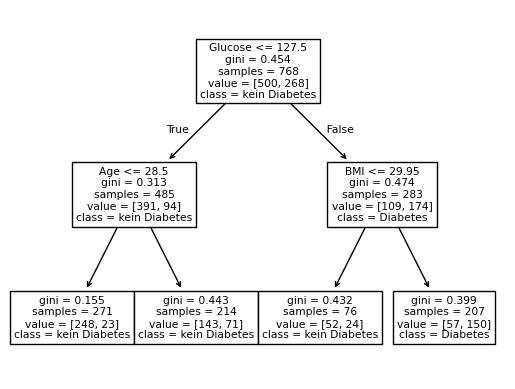

In [21]:
finales_modell = DecisionTreeClassifier(max_depth=2)
finales_modell.fit(X,y)

plot_tree(finales_modell,
    feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
    class_names=['kein Diabetes', 'Diabetes']);

Als erstes Entscheidungskriteriujm wird der Glucose-Wert benutzt. Je nachdem, ob der Glucose-Wert kleiner 127.5 ist oder nicht, wird danach das Alter (jünger als 28.5 bedeutet dann kein Diabetes) oder der BMI (kleiner als 29.95 kein Diabetes) als Entscheidungsmerkmal verwendet. 